In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

2023-04-01 18:34:12.373889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(100, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

2023-04-01 18:34:17.926630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 18:34:17.932603: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
dataset = keras.datasets.cifar10
(xtrain_full, ytrain_full), (xtest, ytest) = dataset.load_data()

In [4]:
xtrain_full.shape, ytrain_full.shape

((50000, 32, 32, 3), (50000, 1))

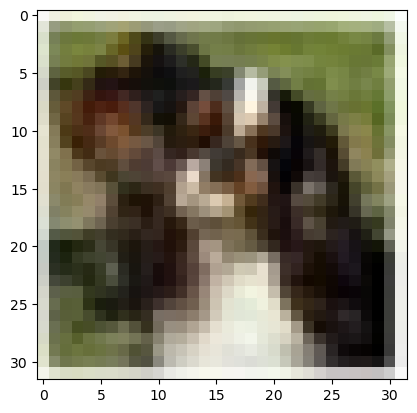

In [5]:
image = xtrain_full[500]
plt.imshow(image)

In [6]:
# https://keras.io/api/layers/preprocessing_layers/
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2)
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


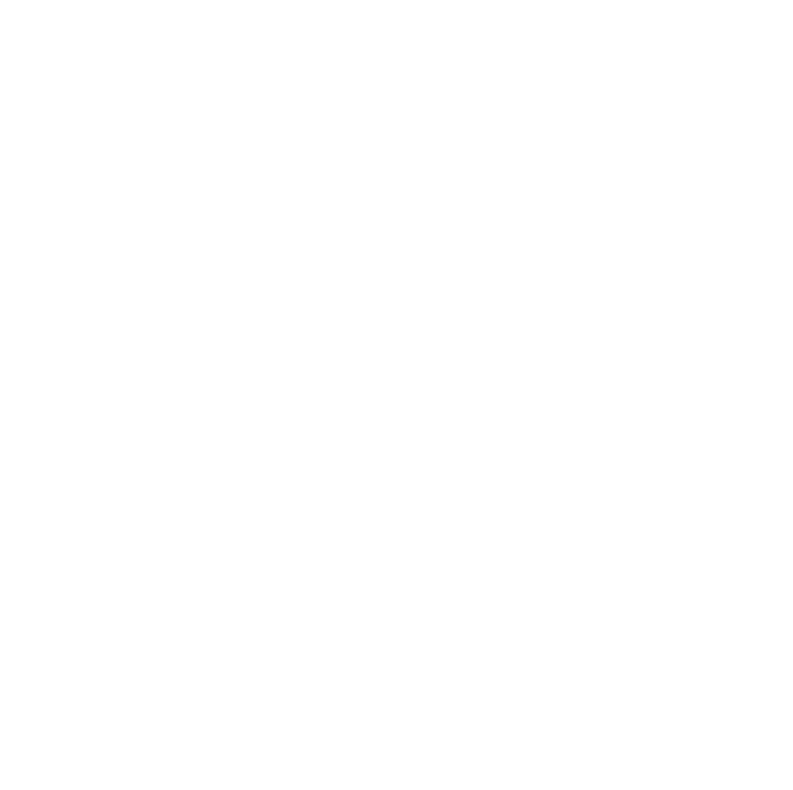

In [7]:
image = xtrain_full[12]
image = tf.expand_dims(image, 0)
plt.figure(figsize=(10, 10))
#plt.subplot(3, 3, 1)
#plt.imshow(image)
#plt.axis("off")
for i in range(9):
    augmented_image = data_augmentation(image)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

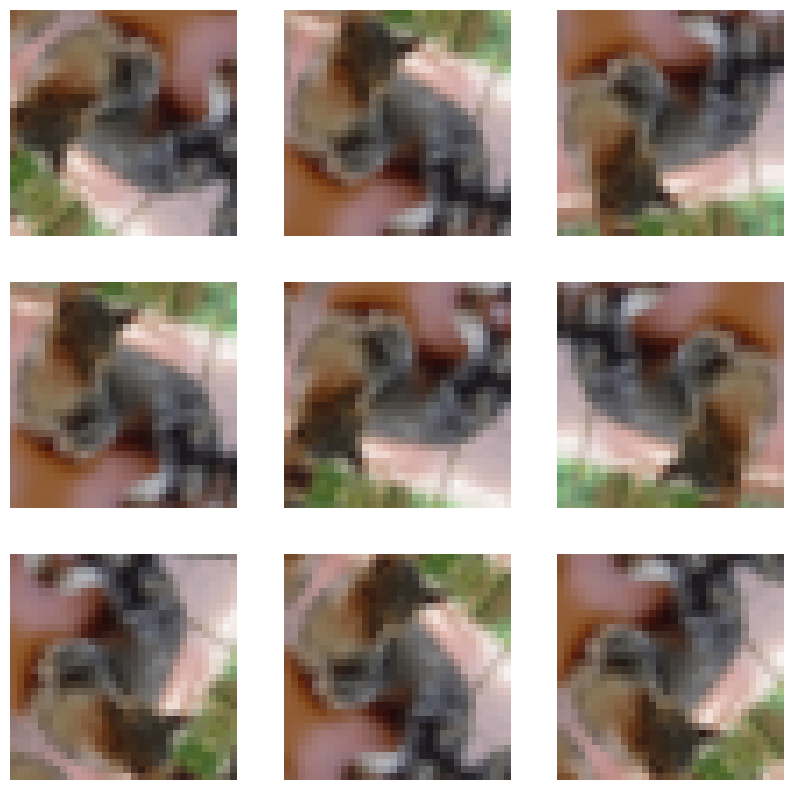

In [8]:
import logging
logging.getLogger('tensorflow').disabled = True

image = xtrain_full[1534]
image = tf.expand_dims(image, 0)
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    normalized_image = augmented_image[0] / 255.0 # normalize to [0, 1]
    plt.subplot(3, 3, i + 1)
    plt.imshow(normalized_image)
    plt.axis("off")

In [9]:
# Create a tensor of shape (3,)
x = tf.constant([1, 2, 3])

# Add a new axis at index 0
y = tf.expand_dims(x, axis=0)

# Print the shapes of the original and expanded tensors
print("Original shape:", x.shape)
print("Expanded shape:", y.shape)
print("Original value x:", x)
print("New Value of y:", y)

Original shape: (3,)
Expanded shape: (1, 3)
Original value x: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
New Value of y: tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)


In [11]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original)
    
    plt.subplot(1, 2, 2)
    plt.title("Augmented Image")
    plt.imshow(augmented)

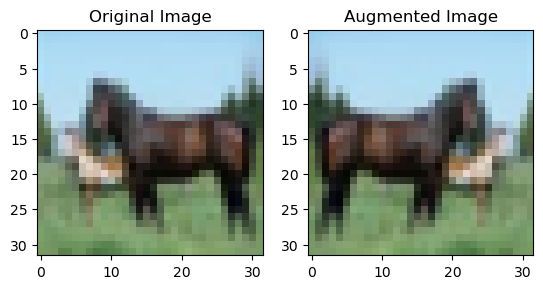

In [12]:
image = xtrain_full[12]
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

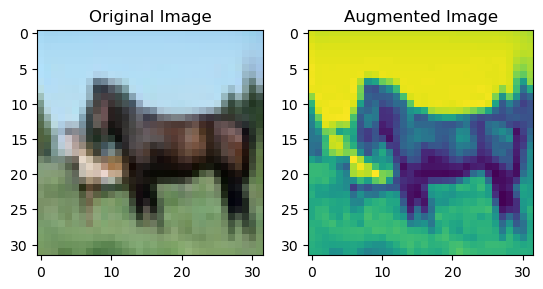

In [14]:
visualize(image, tf.image.rgb_to_grayscale(image))

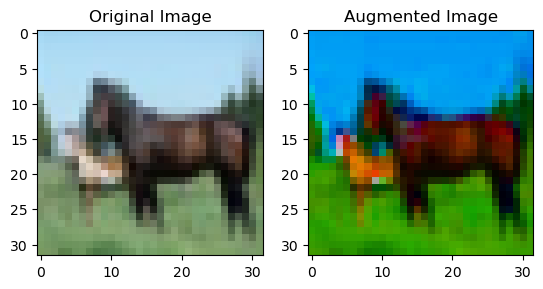

In [17]:
visualize(image, tf.image.adjust_saturation(image, 10))

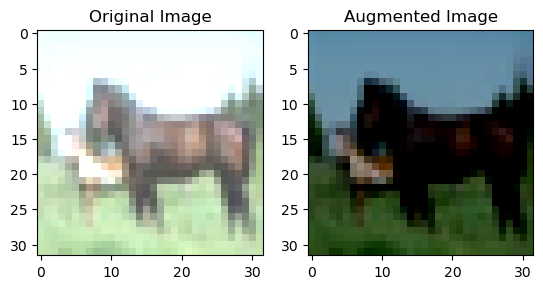

In [26]:
visualize(tf.image.adjust_brightness(image, 0.3), tf.image.adjust_brightness(image, -0.3))

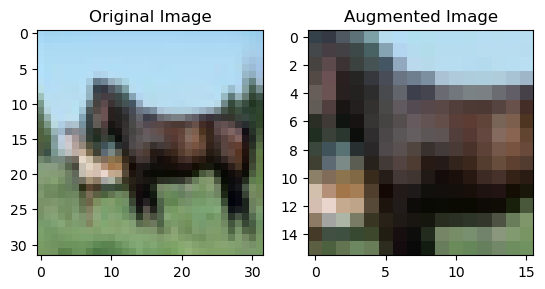

In [30]:
visualize(image, tf.image.central_crop(image, central_fraction=0.5))

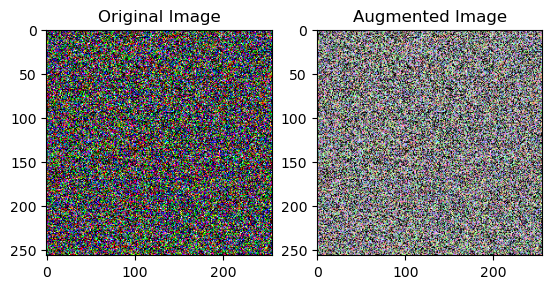

In [42]:
x = tf.random.normal(shape=(256, 256, 3))
x = tf.clip_by_value(x, 0.0, 1.0)
visualize(x, tf.image.adjust_saturation(x, 0.5))

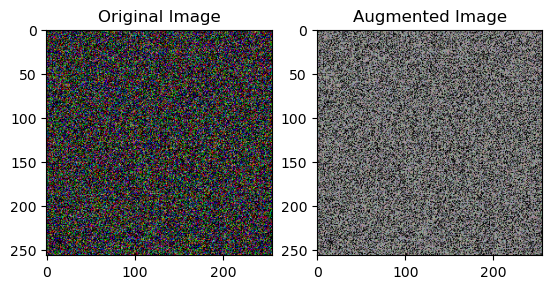

In [63]:
x = tf.random.normal(shape=(256, 256, 3))
x = tf.clip_by_value(x, 0.0, 1.0)
x = tf.clip_by_norm(x, 150)
visualize(x, tf.image.adjust_saturation(x, 0.2))

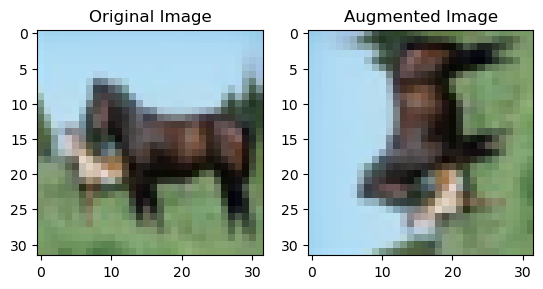

In [65]:
visualize(image, tf.image.rot90(image))

In [66]:
# More details: https://www.tensorflow.org/tutorials/images/data_augmentation